In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
#import bitstring
from math import cos, pi

In [2]:
# Roulette wheel selection

def roulette_wheel_selection(population):
  
    # Computes the totallity of the population fitness
    
    population_fitness = sum([abs(chromosome[0]) for chromosome in population])
    #print('population fitness', population_fitness)
    # Computes for each chromosome the probability 
    chromosome_probabilities = [abs(chromosome[0])/population_fitness for chromosome in population]
    
    # Making the probabilities for a minimization problem
    chromosome_probabilities = np.array(chromosome_probabilities)
    #print('Chromosome probability', chromosome_probabilities)
    #tot= sum([chromosome_probabilitie for chromosome_probabilitie in chromosome_probabilities])
    #print('total prob', tot)
    population_chromosomes_fitness=[]
    for i in range(len(population)):
        population_chromosomes_fitness.append(population[i][0])
    #print(population_chromosomes_fitness)
    #print('shape',np.shape(population_chromosomes_fitness))
    index_lst= list(range(100))
    # Selects one chromosoms based on the computed probabilities
    parents_list=[]
    for i in range(len(population)):
        index= np.random.choice(index_lst, p=chromosome_probabilities)
        parents_list+=[population[index]]
    #parents_list=  np.random.choice(population_chromosomes_fitness, p=chromosome_probabilities)
    length= len(parents_list)
    #print('length of parent list: ',length)
    return parents_list

In [3]:
# mapping (x,y) in chromosomes into bitstring
def bitstring_map(parents_chromosomes_list):
    
    for i in range(len(parents_chromosomes_list)):
        #parents_chromosomes_list[i]=(((bitstring.BitArray(float=parents_chromosomes_list[i][0], length=32).bin),
                                      #bitstring.BitArray(float=parents_chromosomes_list[i][1], length=32).bin))
        #print((x,y))
        #parents_chromosomes_list.append((x,y))
        #print(parents_chromosomes_list[i][0])
        parents_chromosomes_list[i]= ((format(int(parents_chromosomes_list[i][0]* 10000),'b')),
                                      (format(int(parents_chromosomes_list[i][1]* 10000),'b')))
        #print(parents_chromosomes_list[i])
       
    return parents_chromosomes_list


In [4]:

def crossover(parents):
    # parents: list(x,y) 
    children=[]
    children.append(parents[0])
    for i in range(len(parents)-1):
        j= random.randint(0,6)
        k= random.randint(6,17)
        child= parents[i][0][:j] + parents[i+1][0][j:],parents[i][1][:j] + parents[i+1][1][j:]
        child= parents[i][0][:k] + parents[i+1][0][k:],parents[i][1][:k] + parents[i+1][1][k:]
        children.append((child))
        #children.append((parents[i][0][:j] + parents[i+1][0][j:],parents[i][1][:j] + parents[i+1][1][j:]))
    return children

In [5]:
def mutation(new_generation):
    #new_generation: list(x,y); where x and y are in bits
    mutation_sites= 4
    for i in range(len(new_generation)):
        mutation_gene= list(random.sample(range(0,31),4))
        new_generation[i]= ((new_generation[i][0][:mutation_gene[0]]+'1'+new_generation[i][0][mutation_gene[0]+1:],
                             new_generation[i][1][:mutation_gene[0]]+'1'+new_generation[i][1][mutation_gene[0]+1:]))
        new_generation[i]= ((new_generation[i][0][:mutation_gene[1]]+'0'+new_generation[i][0][mutation_gene[1]+1:],
                             new_generation[i][1][:mutation_gene[1]]+'0'+new_generation[i][1][mutation_gene[1]+1:]))
        new_generation[i]= ((new_generation[i][0][:mutation_gene[2]]+'1'+new_generation[i][0][mutation_gene[2]+1:],
                             new_generation[i][1][:mutation_gene[2]]+'1'+new_generation[i][1][mutation_gene[2]+1:]))
        new_generation[i]= ((new_generation[i][0][:mutation_gene[3]]+'0'+new_generation[i][0][mutation_gene[3]+1:],
                             new_generation[i][1][:mutation_gene[3]]+'0'+new_generation[i][1][mutation_gene[3]+1:]))
                                
    return new_generation

In [6]:
# Mapping bits back to decimal numbers

def map_back(new_generation):
    for i in range(len(new_generation)):
        #parents_chromosomes_list[i]=(((bitstring.BitArray(float=parents_chromosomes_list[i][0], length=32).bin),
                                      #bitstring.BitArray(float=parents_chromosomes_list[i][1], length=32).bin))
        #print((x,y))
        #parents_chromosomes_list.append((x,y))
        #print(parents_chromosomes_list[i][0])
        new_generation[i]= ((int(str(new_generation[i][0]),2))/10000,
                                      (int(str(new_generation[i][1]),2))/10000)
        #lst[1]= ((int(str(lst[1][0]),2)),
         #           (int(str(lst[1][1]),2)))
        #print(new_generation[i])
       
    return new_generation

In [7]:
def genetic_algo(function, lower_bound, upper_bound,initial_pop_size=100):
    '''
    Function: Function to be optimized
    lower_bound : lower most bound of interval
    upper_bound : upper most bound of interval
    initial_pop_size: size of initial population
    '''
    
    # Initial population

    population = [] # initial nested list (rosenbrock(x,y),(x,y))
    for i in range(initial_pop_size):
        x= round(np.random.uniform(lower_bound,upper_bound),6)
        y= round(np.random.uniform(lower_bound,upper_bound),6)
        population.append((1/(function(x,y)),(x,y)))
    
    for i in range(10000):
        
        parents_list= roulette_wheel_selection(population)
        #print("Generation {} parent list".format(i), len(parents_list))
        # Parents selected from initial population 
       
               
        parents_chromosomes= []
        for val in range(len(parents_list)):
            parents_chromosomes+=[parents_list[val][1]]
    
        
        bit_map_parent= bitstring_map(parents_chromosomes)
        new_generation= crossover(bit_map_parent)
        #print("Generation {} crossover list".format(i), len(new_generation))
        new_generation= mutation(new_generation)
        #print("Generation{}".format(i), len(new_generation))
        new_generation= map_back(new_generation)
        
        new_population= []
        for (x,y) in new_generation:
            new_population.append((1/(function(x,y)),(x,y)))
     
        population = new_population
        fittest_individual= max(chromosome for chromosome in population)
        print("Generation {} best fit value".format(i), fittest_individual[0])
        print("Best fit solutions", fittest_individual[1])
        #print(population[:10])
        #print("fittest individual in generation {}".format(i))
        if fittest_individual[0] >999:
            break
        
        #print("Generation {}\n".format(i),population)
    return population

In [8]:
def rastrigin(x,y):
    return 20+ x**2 + y**2 - 10*(cos(2*pi*x)+ cos(2*pi*y))

In [17]:
genetic_algo(rastrigin,10,100)

Generation 0 best fit value 0.0569394116930242
Best fit solutions (3.102, 2.7782)
Generation 1 best fit value 0.05705283548521476
Best fit solutions (3.1012, 2.7782)
Generation 2 best fit value 0.058560830388255124
Best fit solutions (1.4772, 1.1414)
Generation 3 best fit value 0.05366586299677432
Best fit solutions (1.8279, 0.4663)
Generation 4 best fit value 0.25731592473406595
Best fit solutions (1.8791, 1.8487)
Generation 5 best fit value 0.10593892509721918
Best fit solutions (2.9054, 2.9438)
Generation 6 best fit value 0.8252232104787776
Best fit solutions (2.0836, 2.0788)
Generation 7 best fit value 1.1603957962495441
Best fit solutions (1.1618, 1.137)
Generation 8 best fit value 4.231702438027121
Best fit solutions (1.1558, 1.131)
Generation 9 best fit value 0.7887908719011505
Best fit solutions (2.0844, 2.0796)
Generation 10 best fit value 2.2770944291361146
Best fit solutions (0.8425, 0.8425)
Generation 11 best fit value 1.1415288579217722
Best fit solutions (1.9025, 1.9025)


Generation 112 best fit value 2.3719519770556405
Best fit solutions (1.9098, 1.9098)
Generation 113 best fit value 2.5143562803176778
Best fit solutions (1.9102, 1.9102)
Generation 114 best fit value 2.0248280985787606
Best fit solutions (1.9086, 1.9086)
Generation 115 best fit value 2.0248280985787606
Best fit solutions (1.9086, 1.9086)
Generation 116 best fit value 1.8477585716442437
Best fit solutions (1.1467, 1.1467)
Generation 117 best fit value 1.8126830889384156
Best fit solutions (1.1468, 1.1468)
Generation 118 best fit value 2.129152907790344
Best fit solutions (1.909, 1.909)
Generation 119 best fit value 3.4993543067344177
Best fit solutions (1.9121, 1.9121)
Generation 120 best fit value 3.4993543067344177
Best fit solutions (1.9121, 1.9121)
Generation 121 best fit value 0.823649541625788
Best fit solutions (1.8974, 1.8974)
Generation 122 best fit value 1.9527887251591436
Best fit solutions (1.9083, 1.9083)
Generation 123 best fit value 4.103708578280032
Best fit solutions (2

Generation 260 best fit value 2.8977292606182616
Best fit solutions (2.0679, 2.0679)
Generation 261 best fit value 1.8461880534564332
Best fit solutions (2.0711, 2.0711)
Generation 262 best fit value 2.0857621911545863
Best fit solutions (2.0701, 2.0701)
Generation 263 best fit value 0.040656725627669754
Best fit solutions (1.6759, 1.6759)
Generation 264 best fit value 1.4546164320371646
Best fit solutions (2.0734, 2.0734)
Generation 265 best fit value 2.387587798653657
Best fit solutions (0.8427, 0.8427)
Generation 266 best fit value 1.4683242420264766
Best fit solutions (2.0733, 2.0733)
Generation 267 best fit value 1.603573758432982
Best fit solutions (2.0724, 2.0724)
Generation 268 best fit value 3.609301572492384
Best fit solutions (0.8441, 0.8441)
Generation 269 best fit value 4.4122871558130985
Best fit solutions (0.8446, 0.8446)
Generation 270 best fit value 3.364037306565675
Best fit solutions (0.8439, 0.8439)
Generation 271 best fit value 0.6491376204718046
Best fit solutions

Generation 364 best fit value 0.2838157702946017
Best fit solutions (1.8674, 1.8674)
Generation 365 best fit value 0.15107938180239092
Best fit solutions (0.7871, 0.7871)
Generation 366 best fit value 0.4492584546308582
Best fit solutions (1.8834, 1.8834)
Generation 367 best fit value 1.091036967206388
Best fit solutions (2.0769, 2.0769)
Generation 368 best fit value 0.1207900397032747
Best fit solutions (3.0154, 3.0154)
Generation 369 best fit value 0.9894977584561259
Best fit solutions (2.0783, 2.0783)
Generation 370 best fit value 0.785668800244603
Best fit solutions (2.0821, 2.0821)
Generation 371 best fit value 24.1258541480487
Best fit solutions (1.9164, 1.9164)
Generation 372 best fit value 0.2699641261394058
Best fit solutions (1.8653, 1.8653)
Generation 373 best fit value 7.9844347811860095
Best fit solutions (1.9149, 1.9149)
Generation 374 best fit value 15.712485117892252
Best fit solutions (1.916, 1.916)
Generation 375 best fit value 15.712485117892252
Best fit solutions (1

Generation 469 best fit value 0.40551492431993086
Best fit solutions (1.1644, 1.1644)
Generation 470 best fit value 0.9729213418715833
Best fit solutions (1.1513, 1.1513)
Generation 471 best fit value 15.712485117892252
Best fit solutions (1.916, 1.916)
Generation 472 best fit value 15.712485117892252
Best fit solutions (1.916, 1.916)
Generation 473 best fit value 15.712485117892252
Best fit solutions (1.916, 1.916)
Generation 474 best fit value 0.07425944254438574
Best fit solutions (2.8617, 2.8617)
Generation 475 best fit value 4.622805460443608
Best fit solutions (1.9133, 1.9133)
Generation 476 best fit value 0.10986446313613557
Best fit solutions (1.8108, 1.8108)
Generation 477 best fit value 0.9340408498686101
Best fit solutions (1.1517, 1.1517)
Generation 478 best fit value 0.9340408498686101
Best fit solutions (1.1517, 1.1517)
Generation 479 best fit value 0.9805747471019665
Best fit solutions (1.9003, 1.9003)
Generation 480 best fit value 0.6472645895132566
Best fit solutions (

Generation 574 best fit value 0.038833814657396895
Best fit solutions (3.8769, 3.8769)
Generation 575 best fit value 0.091413143236369
Best fit solutions (2.8953, 2.8953)
Generation 576 best fit value 0.23230116944381338
Best fit solutions (1.1803, 1.1803)
Generation 577 best fit value 1.5228722692478118
Best fit solutions (1.1478, 1.1478)
Generation 578 best fit value 0.5123608734405813
Best fit solutions (0.1835, 0.1835)
Generation 579 best fit value 0.6317302726442501
Best fit solutions (1.8921, 1.8921)
Generation 580 best fit value 0.6403657832158711
Best fit solutions (1.8924, 1.8924)
Generation 581 best fit value 0.45983642535733893
Best fit solutions (1.1618, 1.1618)
Generation 582 best fit value 10.924072915124052
Best fit solutions (1.9155, 1.9155)
Generation 583 best fit value 0.10865416066344269
Best fit solutions (1.2198, 1.2198)
Generation 584 best fit value 7.640310383256016
Best fit solutions (1.9148, 1.9148)
Generation 585 best fit value 3.1746901923445816
Best fit solu

Generation 685 best fit value 0.16346164220711368
Best fit solutions (2.1372, 2.1372)
Generation 686 best fit value 0.31625588400631466
Best fit solutions (0.817, 0.817)
Generation 687 best fit value 0.3242458200723632
Best fit solutions (0.8177, 0.8177)
Generation 688 best fit value 0.6902724391321013
Best fit solutions (1.894, 1.894)
Generation 689 best fit value 0.11371644122287504
Best fit solutions (1.2166, 1.2166)
Generation 690 best fit value 0.1013769462409345
Best fit solutions (2.9134, 2.9134)
Generation 691 best fit value 8.360542725126534
Best fit solutions (1.915, 1.915)
Generation 692 best fit value 6.065222048726159
Best fit solutions (1.9142, 1.9142)
Generation 693 best fit value 8.773309286854573
Best fit solutions (1.9151, 1.9151)
Generation 694 best fit value 0.0985780934487309
Best fit solutions (0.758, 0.758)
Generation 695 best fit value 0.12974711750284806
Best fit solutions (1.8238, 1.8238)
Generation 696 best fit value 0.13203030281915396
Best fit solutions (0.

KeyboardInterrupt: 

In [10]:
def rosenbrock(x,y):
    return ((1-x)**2 + (100*(y-x**2)**2))

In [16]:
genetic_algo(rosenbrock,0,1000)

Generation 0 best fit value 0.0048007843177472155
Best fit solutions (15.3449, 235.6248)
Generation 1 best fit value 0.0008489388642538441
Best fit solutions (15.3449, 232.348)
Generation 2 best fit value 0.0035655459550476736
Best fit solutions (7.7762, 58.9378)
Generation 3 best fit value 0.009476117715086975
Best fit solutions (7.6746, 58.1186)
Generation 4 best fit value 0.022948815245277466
Best fit solutions (2.4109, 6.4573)
Generation 5 best fit value 0.414649983283691
Best fit solutions (1.119, 1.407)
Generation 6 best fit value 0.07830510791411793
Best fit solutions (1.119, 0.895)
Generation 7 best fit value 1.1251348714056064
Best fit solutions (1.0918, 1.0982)
Generation 8 best fit value 39.273930273555216
Best fit solutions (1.0395, 1.0651)
Generation 9 best fit value 65.31374192170608
Best fit solutions (1.0861, 1.1885)
Generation 10 best fit value 110.44704496244269
Best fit solutions (1.0914, 1.1938)
Generation 11 best fit value 44.31354985819284
Best fit solutions (1.08

[(0.001398800540916051, (2.2091, 2.2091)),
 (0.002438498419865232, (2.0075, 2.0075)),
 (3.13788666800956e-06, (8.0298, 8.0298)),
 (6.819217040572863e-05, (4.0151, 4.0151)),
 (3.137551854820298e-06, (8.03, 8.03)),
 (3.504772052952058e-06, (7.8254, 7.8254)),
 (2.9094804795545676e-05, (4.8342, 4.8342)),
 (6.820008903963139e-05, (4.015, 4.015)),
 (3.504772052952058e-06, (7.8254, 7.8254)),
 (1.7093058749798903e-07, (16.0602, 16.0602)),
 (0.029162960897839905, (1.4133, 1.4133)),
 (4.984280072759847e-06, (7.211, 7.211)),
 (0.18204199403349486, (0.6359, 0.6359)),
 (6.820008903963139e-05, (4.015, 4.015)),
 (3.13788666800956e-06, (8.0298, 8.0298)),
 (1.7093058749798903e-07, (16.0602, 16.0602)),
 (7.362730642165083e-07, (11.3068, 11.3068)),
 (6.823969952418773e-05, (4.0145, 4.0145)),
 (3.141572564911033e-06, (8.0276, 8.0276)),
 (8.193789947764779e-05, (3.8606, 3.8606)),
 (8.716275502291928e-05, (3.8102, 3.8102)),
 (6.815259454011527e-05, (4.0156, 4.0156)),
 (0.002853303807257174, (1.9559, 1.9559)

In [12]:
rosenbrock(0.9982, 0.9982)

0.00032607464976002306

C:\Users\ashut\AppData\Local\Temp\ipykernel_17488\3798514722.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


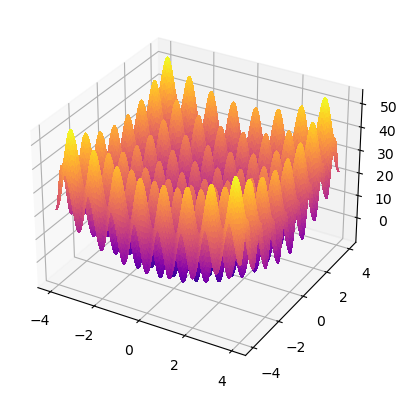

In [13]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib.pyplot as plt
import numpy as np

def rastrigin(*X, **kwargs):
    A = kwargs.get('A', 10)
    return A + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])

if __name__ == '__main__':
    X = np.linspace(-4, 4, 200)    
    Y = np.linspace(-4, 4, 200)    

    X, Y = np.meshgrid(X, Y)

    Z = rastrigin(X, Y, A=10)

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.plasma, linewidth=0, antialiased=False)    
    plt.savefig('rastrigin.png')